## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
converted= df['converted'].mean()
converted

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
#create separate DFs for treatment vs control groups
#treatment group
treatment_df= df.query('group=="treatment"')

In [7]:
#control group
control_df= df.query('group=="control"')

In [8]:
#check total of treatments NOT matching to new_page
#get unique numbers
treatment_df.groupby(['landing_page']).user_id.nunique()

landing_page
new_page    145310
old_page      1965
Name: user_id, dtype: int64

In [9]:
#check total of controls ARE matching to new_page
#get unique numbers
control_df.groupby(['landing_page']).user_id.nunique()

landing_page
new_page      1928
old_page    145274
Name: user_id, dtype: int64

In [10]:
#formula for treatment=/= new_page
## treatment & old_page + control & new_page
notmatch= treatment_df.query('landing_page=="old_page"').nunique() + control_df.query('landing_page=="new_page"').nunique()
notmatch

user_id         3893
timestamp       3893
group              2
landing_page       2
converted          4
dtype: int64

f. Do any of the rows have missing values?

No

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

****Alternative solution****

df2=df.query('group=="treatment" and landing_page=="new_page"') 

df1=df.query('group=="control" and landing_page=="old_page"') 

df2=df2.append(df1)

In [11]:
#create df2 where treatment&new_page + control&old_page are together
df2=treatment_df.query('landing_page=="new_page"') 
df1=control_df.query('landing_page=="old_page"') 
df2=df2.append(df1)

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
#count of all unique user_id
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
#add is_duplicated column to label dupes, find the dupe row
df2['is_duplicated'] = df2.duplicated(['user_id'])
df2[df2["is_duplicated"]]

,user_id,timestamp,group,landing_page,converted,is_duplicated
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,True


c. What is the row information for the repeat **user_id**? 

user_id: 773192

Group: Treatment

landing_page: new_page

Converted: 0/False

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
#drop the dupe user_id, keeping the last entree in place
df2.drop_duplicates(['user_id'], inplace=True)

In [16]:
#check that there are no dupes
df2[(df2['is_duplicated']) == True].shape[0]

0

In [17]:
#drop the is_duplicated column as it is no longer needed
## the total rows should be df2['user_id'].nunique() == 290584
df2.drop(['is_duplicated'], axis=1, inplace=True)
df2

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
10,929503,2017-01-18 05:37:11.527370,treatment,new_page,0
11,834487,2017-01-21 22:37:47.774891,treatment,new_page,0
12,803683,2017-01-09 06:05:16.222706,treatment,new_page,0
13,944475,2017-01-22 01:31:09.573836,treatment,new_page,0
14,718956,2017-01-22 11:45:11.327945,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
#everyone who converted total
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
#everyone who converted in the control group aka old_page
df2.query('group== "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
#everyone who converted in the treatment group aka new_page
df2.query('group== "treatment"')['converted'].mean()

0.11880806551510564

In [21]:
obs_diff= df2.query('group== "treatment"')['converted'].mean() - df2.query('group== "control"')['converted'].mean()
obs_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [22]:
#find probability of receiving new_page
df2.groupby(['converted', 'landing_page']).count()

user_id  timestamp   group
converted landing_page                            
0         new_page       128046     128046  128046
          old_page       127785     127785  127785
1         new_page        17264      17264   17264
          old_page        17489      17489   17489

In [23]:
#the total of all of these lines should equal 290584
##add new_page of 0(not converted) and 1(converted) and divide over total lines
###this should be about 0.5 as this is a fair test between 2 values
(128046+17264)/290584

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

There is not sufficient difference to conclude that the new treatment page leads to more conversions

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

***
Pold = new_page =< old_page

Pnew = new_page > old_page
***

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [24]:
p_new = float(df2.query('converted == 1')['user_id'].nunique())/float(df2['user_id'].nunique())
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [25]:
p_old = float(df2.query('converted == 1')['user_id'].nunique())/float(df2['user_id'].nunique())
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [26]:
#count of all unique user_id in treatment group
n_new= df2.query('group=="treatment"')['user_id'].nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [27]:
#count of all unique user_id in control group
n_old= df2.query('group=="control"')['user_id'].nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
new_page_converted = np.random.binomial(n_new,p_new)
new_page_converted

17569

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
old_page_converted = np.random.binomial(n_old,p_old)
old_page_converted

17352

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
p_new - p_old

0.0

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [31]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(n_new,p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    diff = new_page_converted/n_new - old_page_converted/n_old
    p_diffs.append(diff)

In [32]:
p_diffs = np.array(p_diffs)

In [33]:
p_diffs.mean()

-2.3481475582928527e-06

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

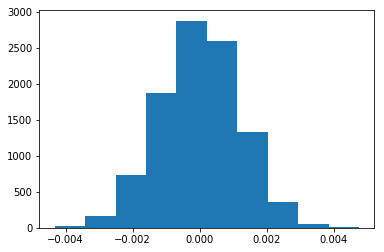

In [34]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [35]:
#calculate the p-value
(p_diffs > obs_diff).mean()

0.9045

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

***
We computed the "p-value" in part J. This is what is it called in scientific studies.

A p-value is the probability that the null hypothesis (the idea that a theory being tested is false) gives for a specific experimental result to happen. 

An experiment must have a p-value of less than 0.05 for the experiment to be considered evidence of the alternative hypothesis; a low p-value means a higher chance of the new hypothesis being true.

According to the p-value found, we cannot reject the null hypothesis. In other words, there is no difference between the new and old pages.
***

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [36]:
import statsmodels.api as sm

# control 
convert_old = sum((df2.group == 'control') & (df2.converted == 1)) 
# treatment
convert_new = sum((df2.group == 'treatment') & (df2.converted == 1)) 
n_old = sum(df2.group == 'control') 
n_new = sum(df2.group == 'treatment') 

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [37]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')

z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

***
The Z score is a test of statistical significance that helps you decide whether or not to reject the null hypothesis; they are measures of standard deviation

The z-score found is -1 standard deviations below the mean.
According to the p-value found, we cannot reject the null hypothesis. In other words, there is no difference between the new and old pages.
***

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

***
It is a binary classification case, so you should use logistic regression
***

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [38]:
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

In [39]:
df2.tail()

,user_id,timestamp,group,landing_page,converted,ab_page
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0,0
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,0


In [40]:
#result
print(df2['ab_page'].mean())
print(df2['converted'].mean())
print(df2.groupby('ab_page').mean()['converted'])

0.5000619442226688
0.11959708724499628
ab_page
0    0.120386
1    0.118808
Name: converted, dtype: float64


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [41]:
df2['intercept'] = 1
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 19 Jul 2019   Pseudo R-squ.:               8.077e-06
Time:                        08:03:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [43]:
np.exp(-0.0150)

0.9851119396030626

In [44]:
1-np.exp(-0.0150)

0.014888060396937353

***
Conversion is 0.98 times as likely for users who landed on the treatment page
***

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

***
pvalue for ab_page is 0.190

The hypotheses for the regression model are:

Hnull = new_page > old_page

Halt = new_page <= old_page

The hypotheses for Part II are:

Hnull == Pold = new_page <= old_page

Halt == Pnew = new_page > old_page
***

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

***
It is important to consider other things such as timestamp (length spent on page). This helps to identify if someone meant to click on that page or not, otherwise known as "bounce rate".

Disadvantages to adding other terms and metrics into the regression model could include 
***

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [45]:
#read in countries
import statsmodels.api as sms;
countries_df= pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [46]:
#create df3 where you join df2 with the countries_df. we will join where user_id are the same
df3= df2.join(countries_df.set_index('user_id'), on='user_id')

In [47]:
#see how this looks
df3.head(3)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA


In [48]:
#making sure that we have the same rows of data as df2
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 2 to 294476
Data columns (total 8 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
ab_page         290584 non-null uint8
intercept       290584 non-null int64
country         290584 non-null object
dtypes: int64(3), object(4), uint8(1)
memory usage: 18.0+ MB


In [49]:
#how many different countries and (what are they) does this df3 have?
df3.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [50]:
#add in dummy values for the countries

country_dummies = pd.get_dummies(df3['country'])
df3 = df3.join(country_dummies)
df3.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0


In [51]:
#Fit a linear model using all three countries to predict the conversion
#Don't forget an intercept.

df3['intercept'] = 1
lm = sm.OLS(df3['ab_page'], df3[['intercept', 'CA', 'UK', 'US']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ab_page   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    -34.75
Date:                Fri, 19 Jul 2019   Prob (F-statistic):               1.00
Time:                        08:03:48   Log-Likelihood:            -2.1096e+05
No. Observations:              290584   AIC:                         4.219e+05
Df Residuals:                  290580   BIC:                         4.220e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.301e+10   1.33e+10     -0.975      0.329   -3.92e+10    1.31e+10
CA          1.301e+10   1.33e+10      0.975      0.329   -1.31e+10    3.92e+10
UK          1.301e+10   1.33e+10      0.975      0.329   -1.31e+10    3.92e+10
US          1.301e+10   1.33e+10      0.975      0.329   -1.31e+10    3.92e+10
==============================================================================
Omnibus:                   990518.153   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48362.431
Skew:                          -0.000   Prob(JB):                         0.00
Kurtosis:                       1.001   Cond. No.                     3.63e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.51e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [52]:
#fit an appropriate linear model for using abs_page to predict the conversion from
# a country. Use CA as your baseline.

lm2 = sm.OLS(df3['ab_page'], df3[['intercept', 'UK', 'US']])
results2 = lm2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ab_page   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8946
Date:                Fri, 19 Jul 2019   Prob (F-statistic):              0.409
Time:                        08:03:48   Log-Likelihood:            -2.1090e+05
No. Observations:              290584   AIC:                         4.218e+05
Df Residuals:                  290581   BIC:                         4.218e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5036      0.004    121.267      0.000       0.495       0.512
UK            -0.0053      0.005     -1.166      0.244      -0.014       0.004
US            -0.0031      0.004     -0.720      0.472      -0.012       0.005
==============================================================================
Omnibus:                   989752.634   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48429.474
Skew:                          -0.000   Prob(JB):                         0.00
Kurtosis:                       1.000   Cond. No.                         9.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

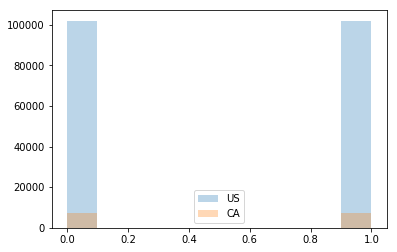

In [53]:
plt.hist(df3.query("US == 1")['ab_page'], alpha = 0.3, label = 'US');
plt.hist(df3.query("CA == 1")['ab_page'], alpha = 0.3, label = 'CA');

plt.legend();

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [56]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_REVISED.ipynb'])

0